<a href="https://colab.research.google.com/github/ruthwikreddy16/customer-churn-prediction/blob/main/Copy_of_balanced_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Check class distribution
print(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop(columns=['Churn'])
y = df['Churn']

# Encode categorical variables (if any)
X_encoded = pd.get_dummies(X, drop_first=True)
y_encoded = y.map({'No': 0, 'Yes': 1})

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)


In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE(Synthetic Minority Oversampling Algorithm)
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check the new class distribution
from collections import Counter
print(Counter(y_train_balanced))


Counter({0: 4138, 1: 4138})


In [ ]:
balanced_dataset = pd.DataFrame(X_train_balanced, columns=X_train.columns)
balanced_dataset['Churn'] = y_train_balanced
balanced_dataset.to_csv('balanced_telecom_churn.csv', index=False)


<ipython-input-7-019f8234e0f1>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  balanced_dataset['Churn'] = y_train_balanced


In [ ]:
# Load the balanced dataset
df = pd.read_csv('/content/balanced_telecom_churn.csv')

# Separate features and target
X = df.drop(columns=['Churn'])
y = df['Churn']


In [ ]:
df.shape

(8276, 13602)

In [ ]:
df.columns


Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'customerID_0003-MKNFE',
       'customerID_0004-TLHLJ', 'customerID_0011-IGKFF',
       'customerID_0013-EXCHZ', 'customerID_0013-MHZWF',
       'customerID_0013-SMEOE', 'customerID_0014-BMAQU',
       ...
       'TotalCharges_996.45', 'TotalCharges_996.85', 'TotalCharges_996.95',
       'TotalCharges_997.65', 'TotalCharges_997.75', 'TotalCharges_998.1',
       'TotalCharges_999.45', 'TotalCharges_999.8', 'TotalCharges_999.9',
       'Churn'],
      dtype='object', length=13602)

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Example: Fill missing values
df.fillna(0, inplace=True)



SeniorCitizen            0
tenure                   0
MonthlyCharges           0
customerID_0003-MKNFE    0
customerID_0004-TLHLJ    0
                        ..
TotalCharges_998.1       0
TotalCharges_999.45      0
TotalCharges_999.8       0
TotalCharges_999.9       0
Churn                    0
Length: 13602, dtype: int64


In [ ]:
# Example: One-hot encoding
X = pd.get_dummies(df.drop(columns=['Churn']), drop_first=True)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X = df.drop(columns=['Churn'])
Y = df['Churn']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score ,confusion_matrix

logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predLR = logmodel.predict(X_test)
predLR

array([0, 1, 1, ..., 1, 0, 0])

In [ ]:
confusion_matrix_LR = confusion_matrix(Y_test, predLR)

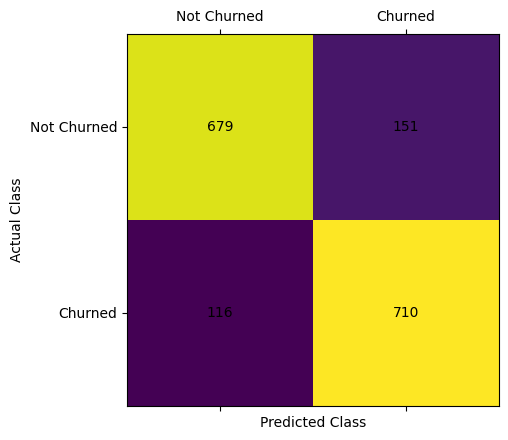

In [ ]:
# create a heatmap of the matrix using matshow()
import matplotlib.pyplot as plt

plt.matshow(confusion_matrix(Y_test, predLR))

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_LR[i, j], ha='center', va='center')


# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

In [ ]:
lracc=accuracy_score(Y_test, predLR)
print(lracc)

0.8387681159420289


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
y_pred_dtc = dtc.predict(X_test)

In [ ]:
print(classification_report(Y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       830
           1       0.86      0.86      0.86       826

    accuracy                           0.86      1656
   macro avg       0.86      0.86      0.86      1656
weighted avg       0.86      0.86      0.86      1656



In [ ]:
confusion_matrix_dtc = confusion_matrix(Y_test, y_pred_dtc)

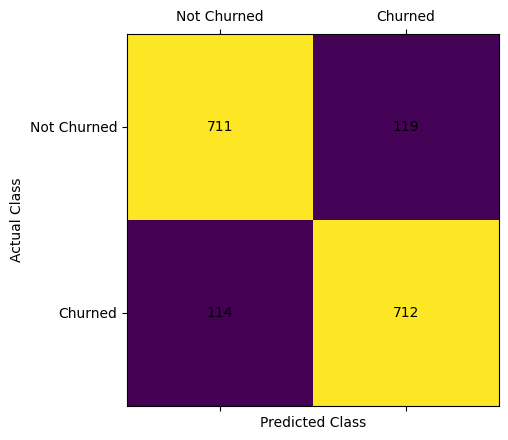

In [ ]:
# create a heatmap of the matrix using matshow()

plt.matshow(confusion_matrix_dtc)

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_dtc[i, j], ha='center', va='center')


# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

In [ ]:
dtacc=accuracy_score(Y_test, y_pred_dtc)
print(dtacc)

0.8592995169082126


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=30)

In [ ]:
pred_knn = knn.predict(X_test)

In [ ]:
import numpy as np
error_rate= []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

In [ ]:
print(classification_report(Y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.75      0.76      0.76       830
           1       0.76      0.75      0.75       826

    accuracy                           0.75      1656
   macro avg       0.75      0.75      0.75      1656
weighted avg       0.75      0.75      0.75      1656



In [ ]:
confusion_matrix_knn = confusion_matrix(Y_test,pred_knn)

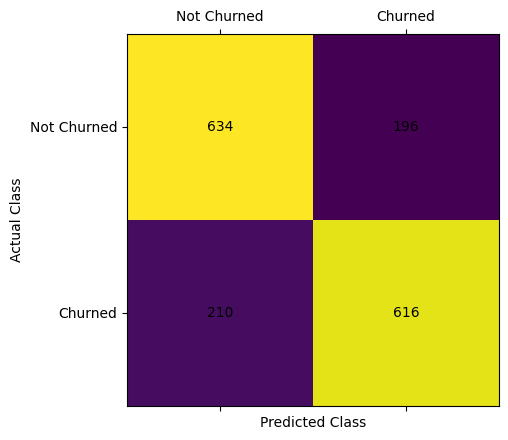

In [ ]:
# create a heatmap of the matrix using matshow()

plt.matshow(confusion_matrix_knn)

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_knn[i, j], ha='center', va='center')

# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

In [ ]:
knnacc=accuracy_score(Y_test, pred_knn)
print(knnacc)

0.7548309178743962


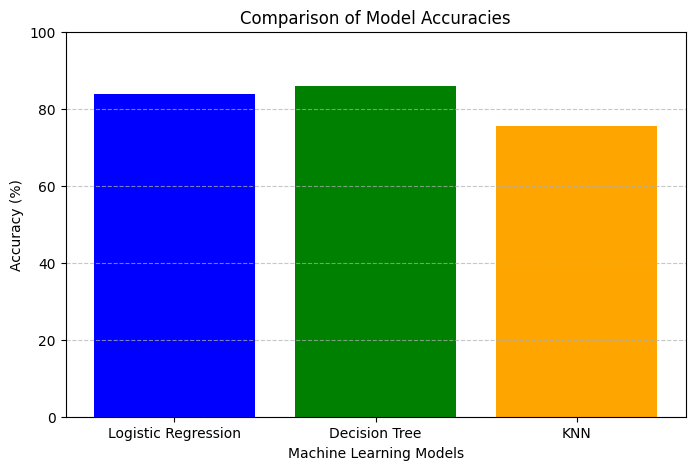

In [ ]:
models = ['Logistic Regression', 'Decision Tree', 'KNN']
accuracies = [lracc*100, dtacc*100, knnacc*100]


plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])


plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.show()